## Create a Training and Test Data Set:
### Decision Trees:
**Develop a decision tree to predict the probability of default**
  - Calculate the accuracy of the model on both the training and test data set
  - Create a graph that shows the ROC curves for both the training and test data set.
  - Clearly label each curve and display the Area Under the ROC curve.
  - Display the Decision Tree using a Graphviz program
  - List the variables included in the decision tree that predict loan default.

**Develop a decision tree to predict the loss amount assuming that the loan defaults**
  - Calculate the RMSE for both the training data set and the test data set
  - Display the Decision Tree using a Graphviz program
  - List the variables included in the decision tree that predict loss amount.

### Random Forests:
**Develop a Random Forest to predict the probability of default**
  - Calculate the accuracy of the model on both the training and test data set
  - Create a graph that shows the ROC curves for both the training and test data set.
  - Clearly label each curve and display the Area Under the ROC curve.
  - List the variables included in the Random Forest that predict loan default.
  - Develop a Random Forest to predict the loss amount assuming that the loan defaults
  - Calculate the RMSE for both the training data set and the test data set
  - List the variables included in the Random Forest that predict loss amount.

### Gradient Boosting:
**Develop a Gradient Boosting model to predict the probability of default**
  - Calculate the accuracy of the model on both the training and test data set
  - Create a graph that shows the ROC curves for both the training and test data set. 
  - Clearly label each curve and display the Area Under the ROC curve.
  - List the variables included in the Gradient Boosting that predict loan default.

**Develop a Gradient Boosting to predict the loss amount assuming that the loan defaults**
  - Calculate the RMSE for both the training data set and the test data set
  - List the variables included in the Gradient Boosting that predict loss amount.

### ROC Curves:
  - Generate a ROC curve for the Decision Tree, Random Forest, and Gradient Boosting models using the Test Data Set
  - Use different colors for each curve and clearly label them
  - Include the Area under the ROC Curve (AUC) on the graph.

In [ ]:
# Load packages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from operator import itemgetter

In [ ]:
# Read in dataset and create dataframe
INFILE = '/content/sample_data/HMEQ_Loss.csv'
main_df = pd.read_csv('/content/sample_data/HMEQ_Loss.csv')
main_dtype = main_df.dtypes

In [ ]:
# Inspect dataframe
main_df.head(2)

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN


In [ ]:
# Inspect datatypes
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_BAD_FLAG  5960 non-null   int64  
 1   TARGET_LOSS_AMT  1189 non-null   float64
 2   LOAN             5960 non-null   int64  
 3   MORTDUE          5442 non-null   float64
 4   VALUE            5848 non-null   float64
 5   REASON           5708 non-null   object 
 6   JOB              5681 non-null   object 
 7   YOJ              5445 non-null   float64
 8   DEROG            5252 non-null   float64
 9   DELINQ           5380 non-null   float64
 10  CLAGE            5652 non-null   float64
 11  NINQ             5450 non-null   float64
 12  CLNO             5738 non-null   float64
 13  DEBTINC          4693 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [ ]:
# Exclude target variables
# Create new dataframe of only datatypes
TARGET_F = 'TARGET_BAD_FLAG'
TARGET_A = 'TARGET_LOSS_AMT'

In [ ]:
# Create two lists to store objects by datatype
objList = []
numList = []

for i in main_dtype.index:
  if i in ([TARGET_F, TARGET_A]): continue
  if main_dtype[i] in (['object']): objList.append(i)
  if main_dtype[i] in (['float64', 'int64']): numList.append(i) 

In [ ]:
print('List of objects:\n', objList, '\n')
print('List of numeric dtypes:\n', numList)

List of objects:
 ['REASON', 'JOB'] 

List of numeric dtypes:
 ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [ ]:
# Inspect all datatypes in objList
for i in objList:
  show_me = main_df[i].value_counts(dropna=False)
  print('\n')
  print(show_me)



DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64


Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64


In [ ]:
# Percent of missing values by datatype
main_df.isna().sum() / len(main_df)

TARGET_BAD_FLAG    0.000000
TARGET_LOSS_AMT    0.800503
LOAN               0.000000
MORTDUE            0.086913
VALUE              0.018792
REASON             0.042282
JOB                0.046812
YOJ                0.086409
DEROG              0.118792
DELINQ             0.097315
CLAGE              0.051678
NINQ               0.085570
CLNO               0.037248
DEBTINC            0.212584
dtype: float64

In [ ]:
# Total missing values by datatype
main_df.isna().sum()

TARGET_BAD_FLAG       0
TARGET_LOSS_AMT    4771
LOAN                  0
MORTDUE             518
VALUE               112
REASON              252
JOB                 279
YOJ                 515
DEROG               708
DELINQ              580
CLAGE               308
NINQ                510
CLNO                222
DEBTINC            1267
dtype: int64

In [ ]:
# Impute missing values for objects with NaNs in objList
for i in objList:
  main_df['REASON'] = main_df['REASON'].fillna(method='ffill')
  main_df['JOB'] = main_df['JOB'].fillna(method='ffill')

In [ ]:
# Impute missing values for objects with NaNs in numList
for i in numList:
  median_value = main_df['LOAN'].median()
  main_df['LOAN'] = main_df['LOAN'].fillna(value=median_value)

  median_value = main_df['MORTDUE'].median()
  main_df['MORTDUE'] = main_df['MORTDUE'].fillna(value=median_value)

  median_value = main_df['VALUE'].median()
  main_df['VALUE'] = main_df['VALUE'].fillna(value=median_value)

  mean_value = main_df['YOJ'].mean()
  main_df['YOJ'] = main_df['YOJ'].fillna(value=mean_value)

  mean_value = main_df['DEROG'].mean()
  main_df['DEROG'] = main_df['DEROG'].fillna(value=mean_value)

  mean_value = main_df['DELINQ'].mean()
  main_df['DELINQ'] = main_df['DELINQ'].fillna(value=mean_value)
  
  mean_value = main_df['CLAGE'].mean()
  main_df['CLAGE'] = main_df['CLAGE'].fillna(value=mean_value)

  mean_value = main_df['NINQ'].mean()
  main_df['NINQ'] = main_df['NINQ'].fillna(value=mean_value)

  mean_value = main_df['CLNO'].mean()
  main_df['CLNO'] = main_df['CLNO'].fillna(value=mean_value)

  mean_value = main_df['DEBTINC'].mean()
  main_df['DEBTINC'] = main_df['DEBTINC'].fillna(value=mean_value)

In [ ]:
# Impute missing values for target variables TARGET_F, TARGET_A
median_value = main_df['TARGET_LOSS_AMT'].median()
main_df['TARGET_LOSS_AMT'] = main_df['TARGET_LOSS_AMT'].fillna(value=median_value)

In [ ]:
# Verify all missing values have been imputed
main_df.isna().sum()

TARGET_BAD_FLAG    0
TARGET_LOSS_AMT    0
LOAN               0
MORTDUE            0
VALUE              0
REASON             0
JOB                0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
dtype: int64

In [ ]:
# Convert object variables to numeric variables; use one-hot-encoding method
# Loop through each object list (objList and numList)
for i in objList :
  print("Class = ", i )
  thePrefix = "IMP_" + i
  print( thePrefix )
  y = pd.get_dummies(main_df[i], prefix = thePrefix, dummy_na = False)
  print(type(y) )
  print(y.head().T )
  main_df = pd.concat([main_df, y], axis = 1 )
  main_df = main_df.drop(i, axis = 1 )

print(main_df.head().T)

Class =  REASON
IMP_REASON
<class 'pandas.core.frame.DataFrame'>
                    0  1  2  3  4
IMP_REASON_DebtCon  0  0  0  0  0
IMP_REASON_HomeImp  1  1  1  1  1
Class =  JOB
IMP_JOB
<class 'pandas.core.frame.DataFrame'>
                 0  1  2  3  4
IMP_JOB_Mgr      0  0  0  0  0
IMP_JOB_Office   0  0  0  0  1
IMP_JOB_Other    1  1  1  1  0
IMP_JOB_ProfExe  0  0  0  0  0
IMP_JOB_Sales    0  0  0  0  0
IMP_JOB_Self     0  0  0  0  0
                               0             1  ...             3              4
TARGET_BAD_FLAG         1.000000      1.000000  ...      1.000000       0.000000
TARGET_LOSS_AMT       641.000000   1109.000000  ...   1425.000000   11003.000000
LOAN                 1100.000000   1300.000000  ...   1500.000000    1700.000000
MORTDUE             25860.000000  70053.000000  ...  65019.000000   97800.000000
VALUE               39025.000000  68400.000000  ...  89235.500000  112000.000000
YOJ                    10.500000      7.000000  ...      8.922268      

## Split Data into **Training** and **Test** Data Set

Notes: 
* Main DataFrame: `main_df`
* Datatype DataFrame: `main_dtype`

In [ ]:
# Make a copy of main_df 
# Exclude target variables TARGET_F, TARGET_A
X_df = main_df.copy()
X_df = X_df.drop(TARGET_F, axis=1)
X_df = X_df.drop(TARGET_A, axis=1)

In [ ]:
# Create another dataframe for Y_df
# This holds info in target variables
Y_df = main_df[[TARGET_F, TARGET_A]]
Y_df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.0,1.0,1.0,1.0,0.0
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,11003.0


In [ ]:
# Split data
'''
Use X_df data to predict Y_df
Randomly split dataset into Training and Test 
train_test_split(...,random_state=# allows for reproducibility,....)
TRAINING DATA: 80%
TEST DATA: 20%
'''
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print('FLAG DATA:')
print('TRAINING DATA = ', X_train.shape)
print('TEST DATA = ', X_test.shape, '\n')

FLAG DATA:
TRAINING DATA =  (4768, 18)
TEST DATA =  (1192, 18) 



Notes:
* X_train
* X_test

* Y_train
* Y_test 

## Decision Trees for Classification

In [ ]:
# Create a decision tree classifier with respect to TARGET_F
flag_model_01 = tree.DecisionTreeClassifier(max_depth=5)
flag_model_01 = flag_model_01.fit(X_train, Y_train[TARGET_F])

# Exploring time and memory usage
%timeit sum(range(100))
# !pip install memory_profiler
%load_ext memory_profiler
%memit

1000000 loops, best of 5: 1.03 µs per loop
peak memory: 167.17 MiB, increment: 0.11 MiB


In [ ]:
# Score predictions for Y_train and Y_test
Y_pred_train = flag_model_01.predict(X_train)
Y_pred_test = flag_model_01.predict(X_test)

%timeit sum(range(100))
%memit

1000000 loops, best of 5: 1.02 µs per loop
peak memory: 167.42 MiB, increment: 0.03 MiB


In [ ]:
# Display accuracy of prediction
print('Train Accuracy:', metrics.accuracy_score(Y_train[TARGET_F], Y_pred_train))
print('Test Accuracy (new data):', metrics.accuracy_score(Y_test[TARGET_F], Y_pred_test))

Train Accuracy: 0.893246644295302
Test Accuracy (new data): 0.8850671140939598


In [ ]:
# Create a prediction using probability value 
print('Probability of Loan Default')
probs = flag_model_01.predict_proba(X_train)
probs_grp1 = probs[0:10] # Lists first 10 people and their associated probability 
probs_grp1

Probability of Loan Default


array([[0.06870229, 0.93129771],
       [0.23170732, 0.76829268],
       [0.94667466, 0.05332534],
       [0.40572792, 0.59427208],
       [0.94667466, 0.05332534],
       [0.94667466, 0.05332534],
       [0.        , 1.        ],
       [0.23170732, 0.76829268],
       [0.96558989, 0.03441011],
       [0.94667466, 0.05332534]])

### ROC Curve
* The higher the curve the better
* Use to determine most accurate data set: train vs test

In [ ]:
'''
Y_train[TARGET_F]: this is what actually happened 
probs_grp1: this is the associated probability value for what happened
Column 0 contains row data for Current
Column 1 contains row data for Loan Default
threshold: acts like a trigger to initiate some action you want to perform
'''
# Predict probability of outcomes
probs = flag_model_01.predict_proba(X_train)
probs_grp2 = probs[:,1] # Look across all rows in Column 1 
false_pos_rate_train, true_pos_rate_train, threshold = metrics.roc_curve(Y_train[TARGET_F], probs_grp2)
# print(probs_grp2[0:10],'\n') # Grabs first 10 probabilites 

# Represents area under the ROC Curve (training data)
roc_auc_train = metrics.auc(false_pos_rate_train, true_pos_rate_train)

In [ ]:
# Predict probability of outcomes
probs = flag_model_01.predict_proba(X_test)
probs_grp2 = probs[:,1] # Look across all rows in Column 1 
false_pos_rate_test, true_pos_rate_test, threshold = metrics.roc_curve(Y_test[TARGET_F], probs_grp2)

# Represents area under the ROC Curve (test data)
roc_auc_test = metrics.auc(false_pos_rate_test, true_pos_rate_test)

In [ ]:
# False Positive Rate for first 10 people (with training data)
print(false_pos_rate_train[0:10], '\n')

# True Positive Rate for first 10 people (with training data)
print(true_pos_rate_train[0:10], '\n')

# False Positive Rate for first 10 people (with test data)
print(false_pos_rate_test[0:10], '\n')

# True Positive Rate for first 10 people (with test data)
print(true_pos_rate_test[0:10], '\n')

[0.         0.         0.00235171 0.01724588 0.01750719 0.0619284
 0.0621897  0.1019075  0.17298145 0.17481056] 

[0.         0.11370882 0.24335813 0.44420829 0.44633369 0.7109458
 0.7120085  0.78320935 0.83103082 0.83209352] 

[0.         0.00105932 0.00423729 0.01694915 0.01694915 0.05402542
 0.09533898 0.1684322  0.16949153 0.20762712] 

[0.         0.0766129  0.18145161 0.35887097 0.36290323 0.65322581
 0.71370968 0.77016129 0.77016129 0.80645161] 



In [ ]:
'''
We will save test datasets to compare methods later 
in order to find the best model/approach.
We will use test data for that purpose.
Save false_pos_rate_train to fpr_test
Save true_pos_rate_train to tpr_test
auc_tree = roc_auc_test
'''
fpr_tree = false_pos_rate_test
tpr_tree = true_pos_rate_test
auc_tree = roc_auc_test

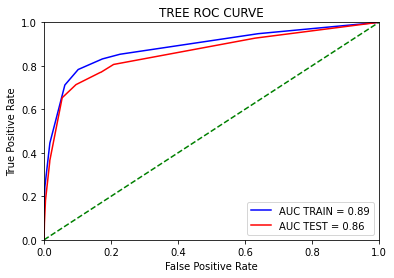

In [ ]:
'''
To test model stability, adjust random_state= paramenter in train_test_split()
See Split Data into Training and Test Data Set
'''
# Create ROC Curve
plt.title('TREE ROC CURVE')
plt.plot(false_pos_rate_train, true_pos_rate_train, 'b',
         label='AUC TRAIN = %0.2f' % roc_auc_train, color='blue')
plt.plot(false_pos_rate_test, true_pos_rate_test, 'b',
         label='AUC TEST = %0.2f' % roc_auc_test, color='red')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Display the Decision Tree using a Graphviz program
* graphviz is not portable and looks at all files on hard drive for graphical files or libraries for displaying files. Running on one machine may be fine, but on another computer, could raise errors depending on what files/libraries are already stored on that machine's harddrive
* Download graphviz.msi file for Win10 or use free web-based version
* Copy and paste output in tree.f.txt into graphviz application
  - Select Layout
  - Select desired output file type
  - Select desired location to store file

In [ ]:
'''
In Google Collab, this will save to temp location on google servers.
Download tree_f.txt file and upload to Google Drive for permanent store'''
# Create graphviz
feature_cols = list(X_df.columns.values)
tree.export_graphviz(flag_model_01,out_file='decision_tree_f.txt',filled=True, rounded=True, 
                      feature_names = feature_cols, impurity=False, precision=0)

#### Selecting Variables in a Model
* Decision trees can narrow the number of variables one needs to focus in on
* Finding tree variables, create a custom function to search

**PROBLEM 1:** `getTreeVars()` loops through varNames[i] which stores X_df.columns (so these are all the variables in play within our dataset). 
  - My assumption was that `getTreeVars()` would grab multiple variables from `varNames` and `append()` them to a `nameList` to show all the most relevant variables used in making the prediction

In [ ]:
# Create tree search function (from lecture notes)
def getTreeVars(TREE, varNames):
  tree_ = TREE.tree_
  varName = [varNames[i] 
             if i != _tree.TREE_UNDEFINED 
             else "undefined!"
             for i in tree_.feature]
  
  nameSet = set()
  for i in tree_.feature:
    if i != _tree.TREE_UNDEFINED:
      nameSet.add(i)
    nameList = list(nameSet)
    parameter_list = list()
    for i in nameList:
      parameter_list.append(varNames[i])
    return parameter_list

In [ ]:
# Output best predictor variable
vars_tree_flag = getTreeVars(flag_model_01, feature_cols)

for i in vars_tree_flag:
  print(i)

DELINQ


### Develop a decision tree to predict the loss amount assuming that the loan defaults

  - Calculate the RMSE for both the training data set and the test data set
  - Display the Decision Tree using a Graphviz program
  - List the variables included in the decision tree that predict loss amount.
  * Ensure NaNs were removed

In [ ]:
# Display output of decision tree using regression models
# First, inspect for NaNs
print('NaN count for Y_train:\n')
print(Y_train.isna().sum(),'\n') # No missing values confirmed
print('NaN count for X_train:\n')
print(X_train.isna().sum()) # No missing values confirmed

NaN count for Y_train:

TARGET_BAD_FLAG    0
TARGET_LOSS_AMT    0
dtype: int64 

NaN count for X_train:

LOAN                  0
MORTDUE               0
VALUE                 0
YOJ                   0
DEROG                 0
DELINQ                0
CLAGE                 0
NINQ                  0
CLNO                  0
DEBTINC               0
IMP_REASON_DebtCon    0
IMP_REASON_HomeImp    0
IMP_JOB_Mgr           0
IMP_JOB_Office        0
IMP_JOB_Other         0
IMP_JOB_ProfExe       0
IMP_JOB_Sales         0
IMP_JOB_Self          0
dtype: int64


In [ ]:
# Create a decision tree regressor with respect to TARGET_A
amt_m01_Tree = tree.DecisionTreeRegressor(max_depth= 5)
amt_m01_Tree = amt_m01_Tree.fit(X_train, Y_train[TARGET_A])

In [ ]:
# Score predictions for Y_pred_train and Y_pred_test
Y_pred_train = flag_model_01.predict(X_train)
Y_pred_test = flag_model_01.predict(X_test)
%memit

peak memory: 170.72 MiB, increment: 0.00 MiB


In [ ]:
# Inspect mean value for train and test
print("MEAN Train", Y_train[TARGET_A].mean())
print("MEAN Test", Y_test[TARGET_A].mean())

MEAN Train 11480.337458053691
MEAN Test 11499.157718120805


In [ ]:
# Perform RMSE
RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Y_train[TARGET_A], Y_pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Y_test[TARGET_A], Y_pred_test))
print("TREE RMSE Train:", RMSE_TRAIN)
print("TREE RMSE Test:", RMSE_TEST, '\n')

RMSE_TREE = RMSE_TEST
feature_cols = list(X_df.columns.values)
vars_tree_amt = getTreeVars( flag_model_01, feature_cols)

TREE RMSE Train: 12455.242717475097
TREE RMSE Test: 12673.130102827317 



### Display the Decision Tree using a Graphviz program
* graphviz is not portable and looks at all files on hard drive for graphical files or libraries for displaying files. Running on one machine may be fine, but on another computer, could raise errors depending on what files/libraries are already stored on that machine's harddrive
* Download graphviz.msi file for Win10 or use free web-based version
* Copy and paste output in tree.f.txt into graphviz application
  - Select Layout
  - Select desired output file type
  - Select desired location to store file

In [ ]:
# Create graphviz 
feature_cols = list(X_df.columns.values)
tree.export_graphviz(flag_model_01, out_file='decision_tree_a.txt', filled=True, rounded=True,
                     feature_names = feature_cols, impurity=False, precision=0)

In [ ]:
# Display relevant variables for model prediction
# vars_tree_amt stores flag_model_01 and feature_cols
for i in vars_tree_amt :
  print(i)
print("FLAG=",vars_tree_flag)

DELINQ
FLAG= ['DELINQ']


## Random Forests
### Develop a Random Forest to predict the probability of default

* Calculate the accuracy of the model on both the training and test data set
* Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.
* List the variables included in the Random Forest that predict loan default.

In [ ]:
# Create a RandomForestClassifier with respect to TARGET_F
# Fit model to data (models are dynamic, data is static)
fm01_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
fm01_RF = fm01_RF.fit(X_train, Y_train[ TARGET_F])
%timeit sum(range(100))
%memit

1000000 loops, best of 5: 1.02 µs per loop
peak memory: 174.31 MiB, increment: 0.00 MiB


In [ ]:
# Score predictions for Y_Pred_train and Y_Pred_test
Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)
%timeit sum(range(100))
%memit

1000000 loops, best of 5: 1.03 µs per loop
peak memory: 174.92 MiB, increment: 0.00 MiB


In [ ]:
# Caculate model accuracy on both train and test data
'''
Interesting, train accuracy is 100% test accuracy is 92%
How does one know that we're not overfitting? That's why we have test data.
Could possibly answer that question by continuous model training
Could possible change random_state= parameter in RandomForestClassifer object
Could also change/specify depth= paramenter in RandomForestClassifier object
'''
print("RANDOM FOREST\n")
print("Probability of Loan Default")
print("Train Accuracy:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Test Accuracy:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))

RANDOM FOREST

Probability of Loan Default
Train Accuracy: 1.0
Test Accuracy: 0.924496644295302


In [ ]:
# Predict probability of outcomes
probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [ ]:
# Predict probability of outcomes
probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [ ]:
# False Positive Rate for first 10 people (with training data)
print(fpr_train[0:10], '\n')

# True Positive Rate for first 10 people (with training data)
print(tpr_train[0:10], '\n')

# False Positive Rate for first 10 people (with test data)
print(fpr_test[0:10], '\n')

# True Positive Rate for first 10 people (with test data)
print(tpr_test[0:10], '\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

[0.         0.0031881  0.01806589 0.04994687 0.09351753 0.13390011
 0.18490967 0.22210414 0.2794899  0.31880978] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

[0.         0.01612903 0.02419355 0.02822581 0.03629032 0.04032258
 0.06048387 0.08467742 0.09274194 0.11290323] 



In [ ]:
'''
We will save test datasets to compare methods later 
in order to find the best model/approach.
We will use test data for that purpose.
Save fpr_test to fpr_RF
Save tpr_test to tpr_RF
roc_auc_test = auc_RF
'''
fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

### ROC Curve
* The higher the curve the better
* Use to determine most accurate data set: train vs test

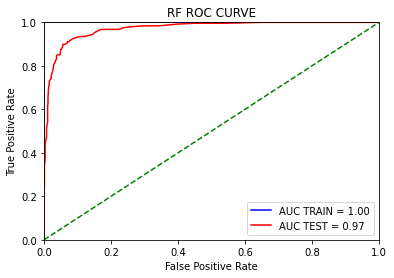

In [ ]:
# Create ROC Curve
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Selecting Variables in a Model
* Random Forests can narrow the number of variables one needs to focus in on
* Finding tree variables, create a custom function to search

In [ ]:
# Create tree search function for Random Forests (from lecture notes)
def getEnsembleTreeVars(ENSTREE, varNames) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_):
            v = int(imp_val / np.max( ENSTREE.feature_importances_) * 100)
            theList.append((varNames[i], v ))
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

In [ ]:
# Gather relevant variables used in model prediction
feature_cols = list(X_df.columns.values)
vars_RF_flag = getEnsembleTreeVars(fm01_RF, feature_cols)

# Output best predictor variable/s
for i in vars_RF_flag :
   print(i)

('DEBTINC', 100)
('DELINQ', 45)
('CLAGE', 42)
('VALUE', 40)
('LOAN', 39)
('CLNO', 35)
('MORTDUE', 34)
('DEROG', 28)
('YOJ', 27)


### Develop a Random Forest to predict the loss amount assuming that the loan defaults
* Calculate the RMSE for both the training data set and the test data set
* List the variables included in the Random Forest that predict loss amount.

In [ ]:
# Create a RandomForestRegressor with respect to TARGET_A
# Fit model to data (models are dynamic, data is static)
amt_m01_RF = RandomForestRegressor(n_estimators = 100, random_state=1)
amt_m01_RF = amt_m01_RF.fit(X_train, Y_train[TARGET_A])

In [ ]:
# Score predictions for X_train and X_test
Y_Pred_train = amt_m01_Tree.predict(X_train)
Y_Pred_test = amt_m01_Tree.predict(X_test)

In [ ]:
# Inspect mean value for train and test
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Y_train[TARGET_A],
                                                   Y_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(Y_test[TARGET_A],
                                                  Y_Pred_test))

print("RF RMSE Train", RMSE_TRAIN)
print("RF RMSE Test", RMSE_TEST)

RF RMSE Train 3214.616729791754
RF RMSE Test 3679.9310534755177


In [ ]:
# List the variables included in the Random Forest that predict loss amount
RMSE_RF = RMSE_TEST
feature_cols = list(X_df.columns.values)
vars_RF_amt = getEnsembleTreeVars(amt_m01_RF, feature_cols)

# Output best predictor variable/s
for i in vars_RF_amt :
   print(i)

('LOAN', 100)
('DELINQ', 63)
('DEBTINC', 42)
('CLNO', 42)
('CLAGE', 30)


## Gradient Boosting
### Develop a Gradient Boosting model to predict the loss amount assuming that the loan defaults
* Calculate the accuracy of the model on both the training and test data set
* Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.
* List the variables included in the Gradient Boosting that predict loan default.

In [ ]:
# Create a GradientBoostingClassifier with respect to TARGET_F
fm01_GB = GradientBoostingClassifier(random_state=1, max_depth=5)
fm01_GB = fm01_GB.fit(X_train, Y_train[TARGET_F])

# Exploring time and memory usage
%timeit sum(range(100))
# !pip install memory_profiler
# %load_ext memory_profiler
%memit

The slowest run took 4.15 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.03 µs per loop
peak memory: 187.06 MiB, increment: 0.00 MiB


In [ ]:
Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

%timeit
%memit

peak memory: 187.71 MiB, increment: 0.00 MiB


In [ ]:
# Display accuracy of prediction
print("GRADIENT BOOSTING\n")
print("Probability of Loan Default")
print("Train Accuracy:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Test Accuracy:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))

GRADIENT BOOSTING

Probability of Loan Default
Train Accuracy: 0.9653942953020134
Test Accuracy: 0.9110738255033557


In [ ]:
# Predict probability of outcomes
probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [ ]:
# Predict probability of outcomes
probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [ ]:
'''
We will save test datasets to compare methods later 
in order to find the best model/approach.
We will use test data for that purpose.
Save fpr_test to fpr_GB
Save tpr_test to tpr_GB
roc_auc_test = auc_GB
'''
fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

### ROC Curve
* The higher the curve the better
* Use to determine most accurate data set: train vs test

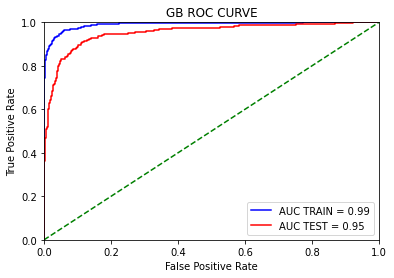

In [ ]:
plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# List the variables included in the Gradient Boosting that predict loss amount
feature_cols = list(X_df.columns.values)
vars_GB_flag = getEnsembleTreeVars(fm01_GB, feature_cols)

# Output best predictor variable/s
for i in vars_GB_flag :
   print(i)

('DEBTINC', 100)
('DELINQ', 35)
('CLAGE', 19)
('VALUE', 13)


### Develop a Gradient Boosting model to predict the loss amount assuming that the loan defaults
* Calculate the RMSE for both the training data set and the test data set
* List the variables included in the decision tree that predict loss amount.

In [ ]:
# Create a GradientBoostingRegressor with respect to TARGET_A
# Fit model to data (models are dynamic, data is static)
amt_m01_GB = GradientBoostingRegressor(random_state=1)
amt_m01_GB = amt_m01_GB.fit( X_train, Y_train[TARGET_A])

In [ ]:
# Score predictions for X_train and X_test
Y_Pred_train = amt_m01_GB.predict(X_train)
Y_Pred_test = amt_m01_GB.predict(X_test)

In [ ]:
# Inspect mean value for train and test
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Y_train[TARGET_A], Y_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(Y_test[TARGET_A], Y_Pred_test))

print("GB RMSE Train:", RMSE_TRAIN)
print("GB RMSE Test:", RMSE_TEST)

GB RMSE Train: 2320.4856880672837
GB RMSE Test: 3198.418830258002


In [ ]:
# List the variables included in the Gradient Boosting that predict loss amount
RMSE_GB = RMSE_TEST
feature_cols = list(X_df.columns.values)
vars_GB_amt = getEnsembleTreeVars(amt_m01_GB, feature_cols)

# Output best predictor variable/s
for i in vars_GB_amt :
   print(i)

('LOAN', 100)
('DELINQ', 68)
('DEBTINC', 58)
('CLNO', 32)
